In [75]:
#Loading packages
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xg
from xgboost import XGBRegressor

#!pip install shap
import shap

Charger et nettoyer les données


In [8]:
#Loading datasets

from google.colab import files
data = files.upload()
dtypes = files.upload()

Saving dtypes.csv to dtypes (1).csv


In [105]:
df_type = pd.read_csv('dtypes.csv', sep=';')
variable_types = dict(zip(df_type.column, df_type.type))
df = pd.read_csv('data.csv', sep=';',  dtype=variable_types, na_values='?')

In [33]:
df_type.head(13)

,column,type
0,name,object
1,year,int64
2,selling_price,int64
3,km_driven,int64
4,fuel,object
5,seller_type,object
6,transmission,object
7,owner,object
8,mileage,object
9,engine,object


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [22]:
#Missing values per variables
df.isnull().sum(axis=0).reset_index()

,index,0
0,name,0
1,year,0
2,selling_price,0
3,km_driven,0
4,fuel,0
5,seller_type,0
6,transmission,0
7,owner,0
8,mileage,221
9,engine,221


In [23]:
#Number of observations that have atleast 1 missing value
df.isna().any(axis=1).sum()

222

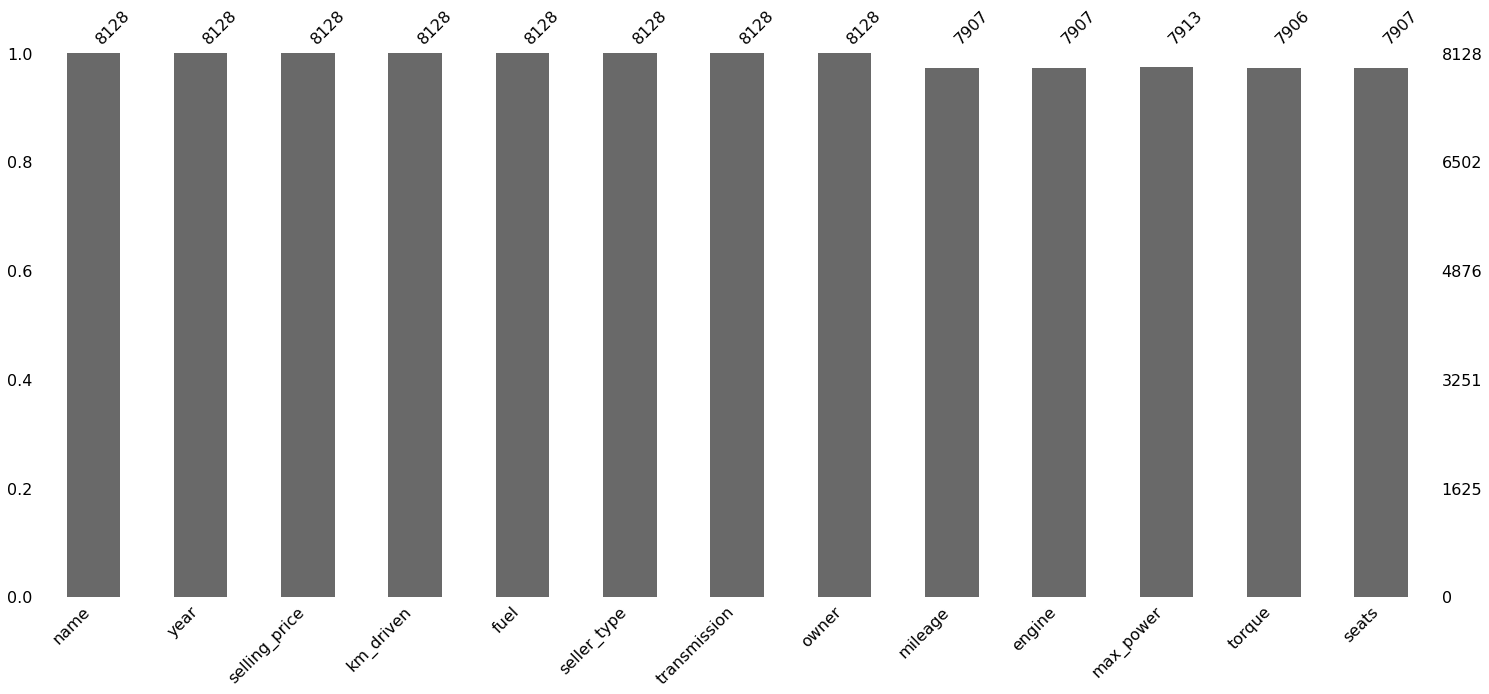

In [24]:
msno.bar(df) #The height of the bar indicates how complete that column

Réaliser une analyse univariée

In [26]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [27]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
df.dtypes.reset_index()

,index,0
0,name,object
1,year,int64
2,selling_price,int64
3,km_driven,int64
4,fuel,object
5,seller_type,object
6,transmission,object
7,owner,object
8,mileage,object
9,engine,object


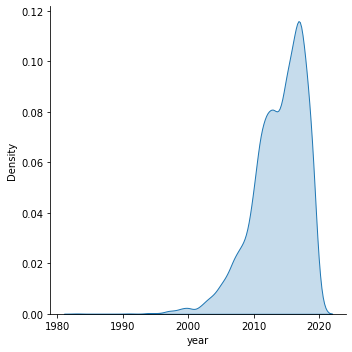

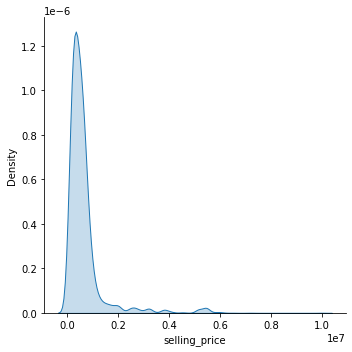

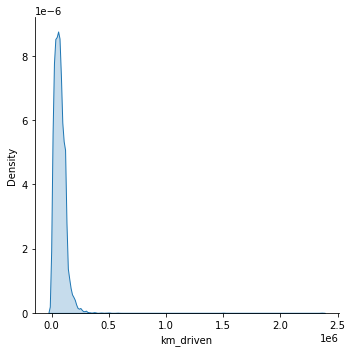

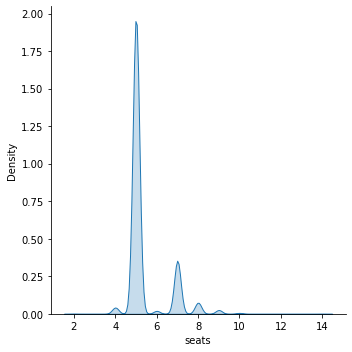

In [28]:
#we want to check the shape of the density of each variables.

for col in list(numerical):
    sn.displot(df, x=col, fill=True, kind="kde")
    plt.show()

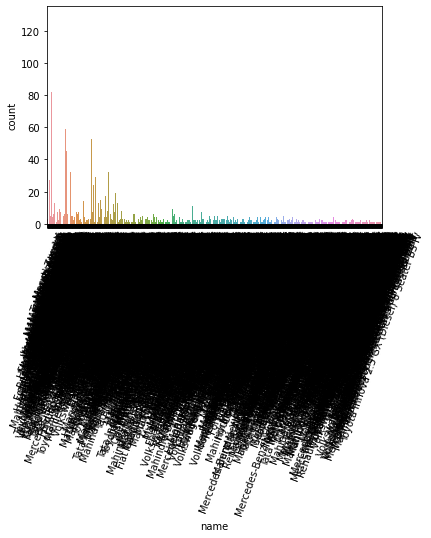

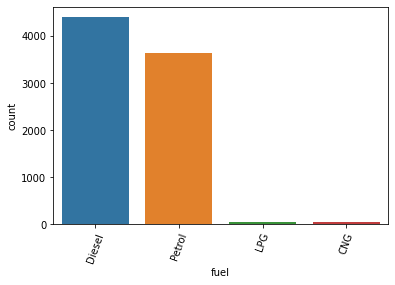

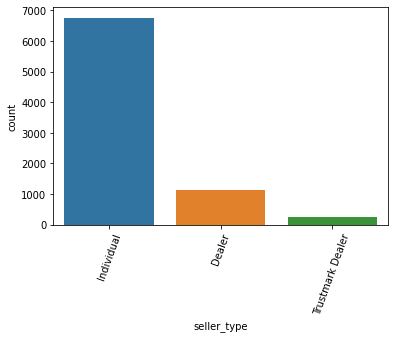

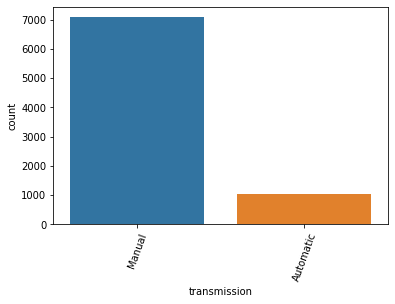

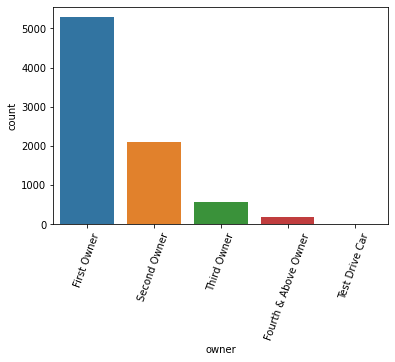

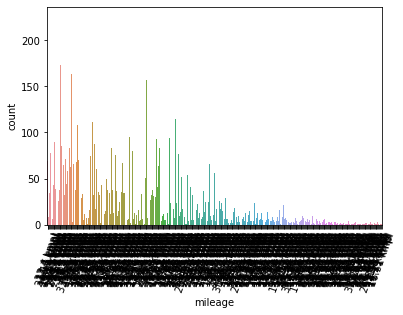

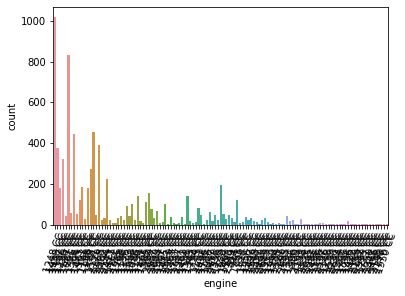

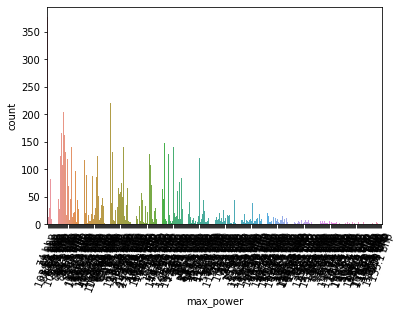

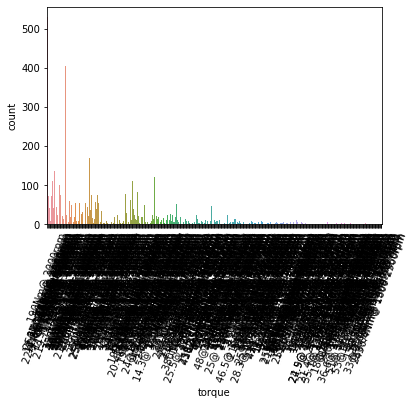

In [35]:
for cat in categorical:
    sn.countplot(data = df, x = cat)
    plt.xticks(rotation=70)
    plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


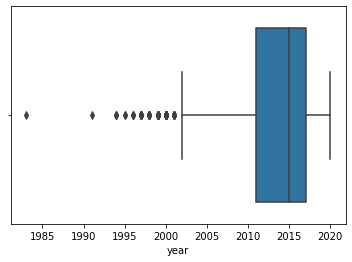

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


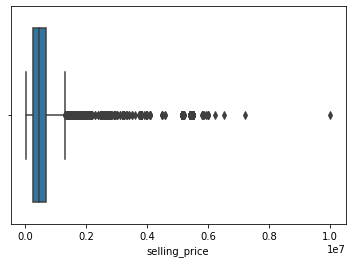

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


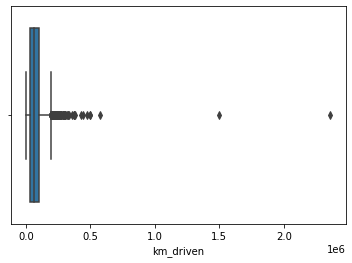

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


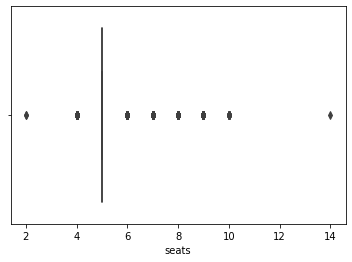

In [36]:
#we want to check how are points distributed for each variables

for col in list(numerical):
    sn.boxplot(df[col])
    plt.show()

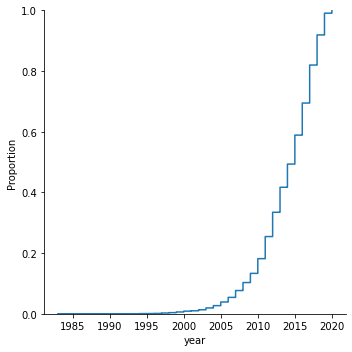

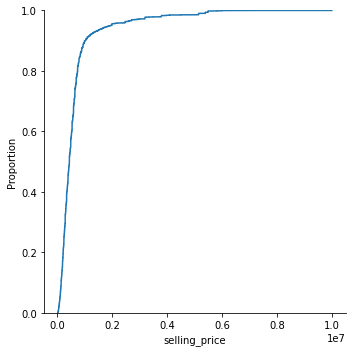

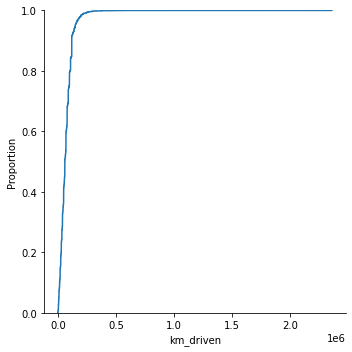

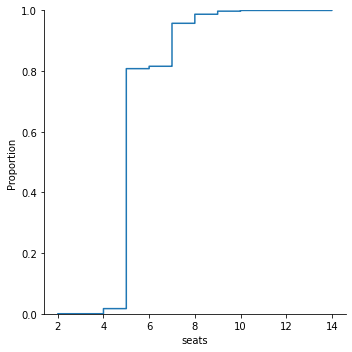

In [37]:
#let's check cumulative distributions
for col in list(numerical):
    sn.displot(df, x=col, kind="ecdf")
    plt.show()

Analyse Multivariée

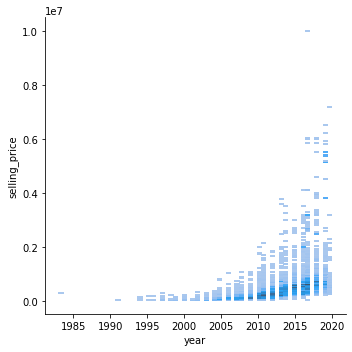

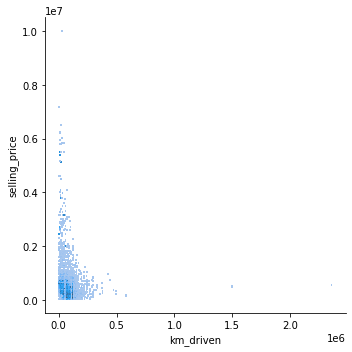

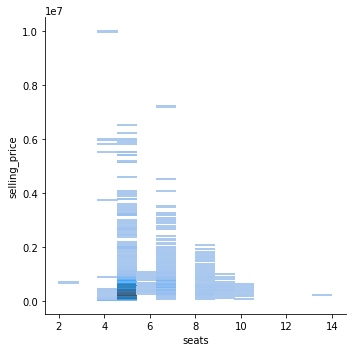

In [39]:
#we visualize distributions between features and target
for col in list(numerical):
  if (col != 'selling_price'):
    sn.displot(df, x=col, y="selling_price")
    plt.show()

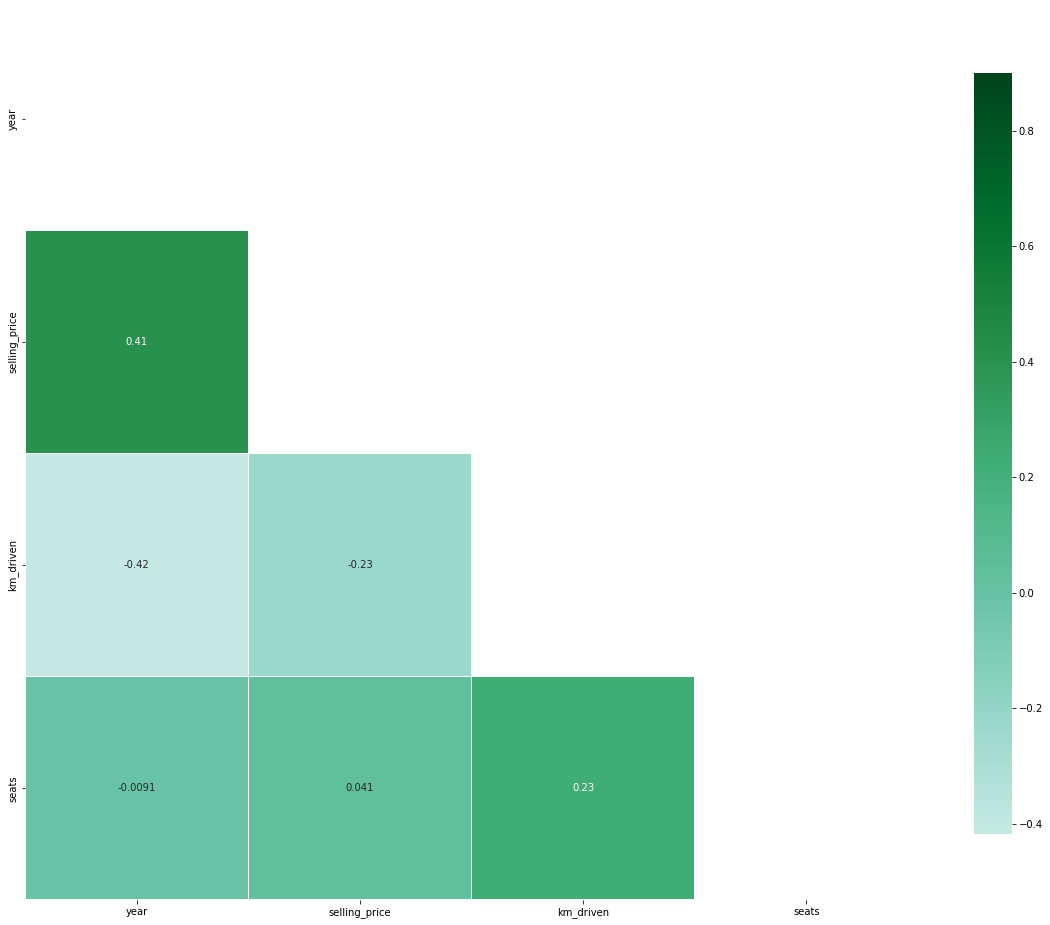

In [41]:
#we check corellations between numerical features and target

corr = df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (20,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(corr, mask=mask, vmax = 0.9, cmap='BuGn', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7}, center=0) 

Gérer les valeurs manquantes et encodage

In [45]:
#Missing values per variables
df.isnull().sum(axis=0).reset_index()

,index,0
0,name,0
1,year,0
2,selling_price,0
3,km_driven,0
4,fuel,0
5,seller_type,0
6,transmission,0
7,owner,0
8,mileage,221
9,engine,221


In [106]:
#2 usual ways to deal with NaN values: delete observations containing NaN values or replacing with mode/mean/median. From our analysis on our missing data with msno, we figured that our data is not missing at random.
#Because of that, we decide to replace missing values using the mean in each column (for numerical variables), and the mode for categorical variables.

# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [107]:
#no more NaN values
df.isnull().sum(axis=0).reset_index()

,index,0
0,name,0
1,year,0
2,selling_price,0
3,km_driven,0
4,fuel,0
5,seller_type,0
6,transmission,0
7,owner,0
8,mileage,0
9,engine,0


In [114]:
#Ordinal Encoding 
enc = OrdinalEncoder()
enc.fit(df[["owner"]])
df[["owner"]] = enc.transform(df[["owner"]])
enc.fit(df[["name"]])
df[["name"]] = enc.transform(df[["name"]])
enc.fit(df[["fuel"]])
df[["fuel"]] = enc.transform(df[["fuel"]])
enc.fit(df[["seller_type"]])
df[["seller_type"]] = enc.transform(df[["seller_type"]])
enc.fit(df[["transmission"]])
df[["transmission"]] = enc.transform(df[["transmission"]])

df['mileage'] = df['mileage'].astype(str)
df['engine'] = df['engine'].astype(str)
df['max_power'] = df['max_power'].astype(str)
df['torque'] = df['torque'].astype(str)

enc.fit(df[["mileage"]])
df[["mileage"]] = enc.transform(df[["mileage"]])
enc.fit(df[["engine"]])
df[["engine"]] = enc.transform(df[["engine"]])
enc.fit(df[["max_power"]])
df[["max_power"]] = enc.transform(df[["max_power"]])
enc.fit(df[["torque"]])
df[["torque"]] = enc.transform(df[["torque"]])







Modélisation

In [115]:
X = df[[col for col in list(df.columns) if col != 'selling_price']]
y = df.selling_price

In [116]:
#Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
regli = LinearRegression()
regli = regli.fit(X_train,y_train)
y_pred_li = regli.predict(X_test)
y_train_pred_li = regli.predict(X_train)

In [118]:
r2_score(y_train, y_train_pred_li)

0.5338393405816871

In [119]:
r2_score(y_pred_li, y_test)

0.0688576549573564

In [130]:
#no time to optimize the ridge regression...
regridge = sklearn.linear_model.Ridge(alpha=.5)
regridge = regridge.fit(X_train,y_train)
y_predridge_li = regridge.predict(X_test)
y_train_predridge_li = regridge.predict(X_train)



In [131]:
r2_score(y_train, y_train_predridge_li)

0.5338391950218526

In [132]:
r2_score(y_predridge_li, y_test)

0.0682180672335756

Construire un modèle Machine Learning de votre choix performant

In [133]:
#XGBoost RandomSearch

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbrandom = XGBRegressor(seed = 20)    

clf = RandomizedSearchCV(estimator=xgbrandom,
                         param_distributions=params,
                         scoring='r2',
                         n_iter=20,
                         verbose=1)

clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[10:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:31] WARNING: /workspace/src/objective/regr

In [134]:
#Let's check metrics for assessment 

xgbregtuned = XGBRegressor(subsample = 0.7, n_estimators = 500, max_depth = 5, learning_rate = 0.1, colsample_bytree = 0.8999999999999999, colsample_bylevel = 0.7)
xgbregtuned = xgbregtuned.fit(X_train, y_train)
y_pred_xgtuned = xgbregtuned.predict(X_test)
y_train_pred_xgtuned = xgbregtuned.predict(X_train)

[10:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [135]:
r2_score(y_train, y_train_pred_xgtuned)

0.996163051220185

In [136]:
r2_score(y_pred_xgtuned, y_test)

0.9360850211388957

In [137]:
mape_xgtuned = np.abs((y_test - y_pred_xgtuned) / y_test) * 100

df_y_pred_xgtuned = pd.DataFrame(data=y_pred_xgtuned, columns=['y_pred_xgtuned'])
df_y_test = pd.DataFrame(data=list(y_test), columns=['y_test'])
df_mape_xgtuned = pd.DataFrame(data=list(mape_xgtuned), columns=['mape_xgtuned'])
df_error_xgtuned = pd.concat([df_y_pred_xgtuned, df_y_test, df_mape_xgtuned], axis=1)
df_error_xgtuned.head()

,y_pred_xgtuned,y_test,mape_xgtuned
0,4.097122e+05,345000,18.757156
1,8.113542e+05,900000,9.849528
2,5.209709e+05,475000,9.678092
3,1.054933e+05,120000,12.088945
4,5.144637e+06,5150000,0.104136


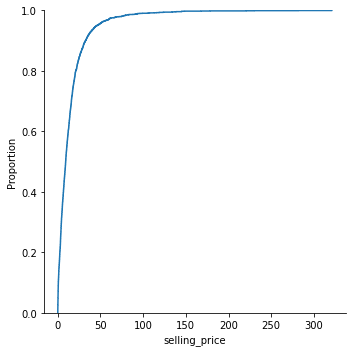

In [138]:
sn.displot(mape_xgtuned, kind="ecdf")

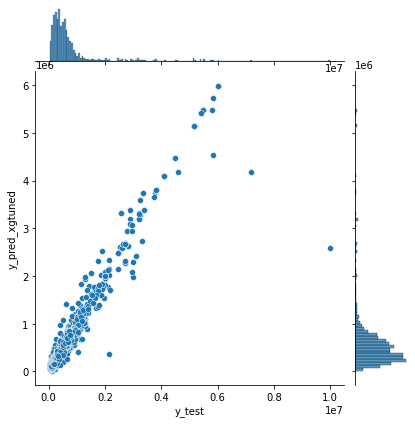

In [140]:
sn.jointplot(data=df_error_xgtuned, x="y_test", y="y_pred_xgtuned")

Text(0.5, 0, 'Relative Importance')

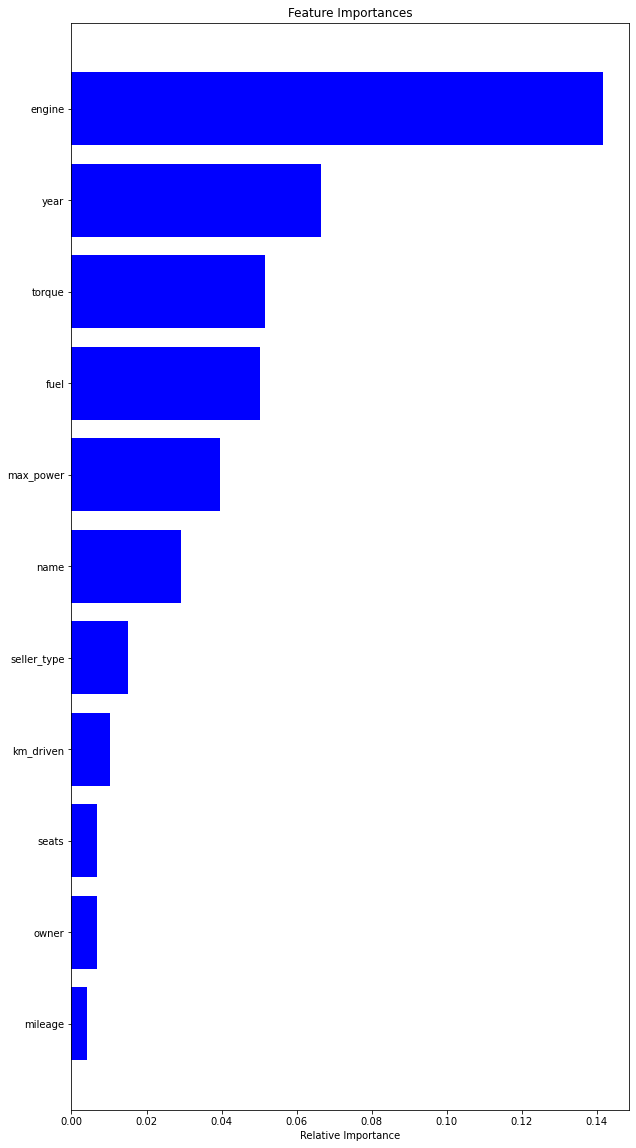

In [141]:
#Feature Importance

features = np.array(X_train.columns)
importances = xgbregtuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
nf = 50
plt.barh(range(len(indices))[-nf:-1], importances[indices][-nf:-1], color='b', align='center')
plt.yticks(range(len(indices))[-nf:-1], features[indices][-nf:-1])
plt.xlabel('Relative Importance')

Interprétabilité

In [142]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP (code takes around 10 minutes)
explainer = shap.TreeExplainer(xgbregtuned)
shap_values = explainer.shap_values(X_test)

# first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

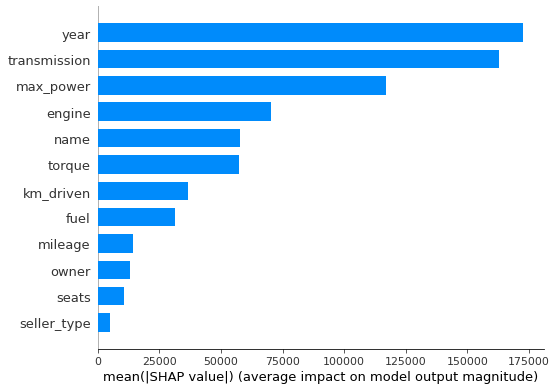

In [143]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

We can see that the *Year* feature is actually the most important, followed by *Transmission*. Now, lets' plot the feature importance for every observation in our data set

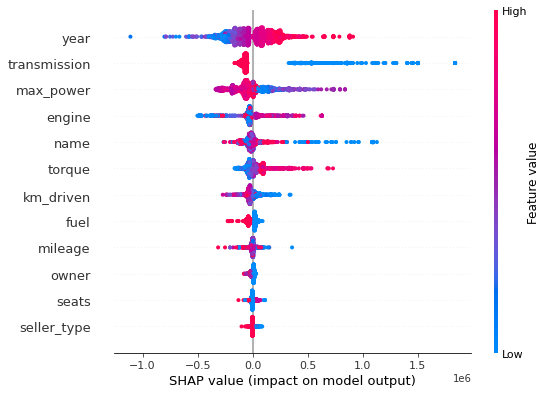

In [145]:
shap.summary_plot(shap_values, X_test)

Features are sorted by mean(|SHAP Value|) and so we again see the *Year* feature as the strongest predictor for the target.

The x position of the dot is the impact of that feature on the model’s prediction for the target, and the color of the dot represents the value of that feature for the target.

This plot allows us to see important outlier effects. For example, *fuel* is not the most important feature, but the coloring shows us that the Petrol has a clear negative impact on the target, while the Diesel fuel type makes the selling price higher.